In [10]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statistics
from scipy.integrate import solve_ivp

In [11]:
# I Deriving PCA from the SVD 
df = pd.read_csv('ovarian_cancer.csv')

In [12]:
#1. Implement principal component analysis for an arbitrary dataset: 
#.  you may use an implementation of the singular value decomposition.

#function to compute pca
def PCA(data):
    xmean = data.mean(axis=1)                                #mean of each row
    xbar = xmean * np.ones((1, data.shape[1]))               #avg matrix
    matrixB = data - xbar                                    #Subtract data
    U, S, VT = np.linalg.svd(matrixB, full_matrices = False) #SVD decomp on matrix B
    S = np.diag(S)                                           #Singular values from S to construct a diag matrix S
    T = np.matmul(U,S)                                       #principle component mat
    return T,S                                               #return compoment matrix T and Sigma from svd decomp

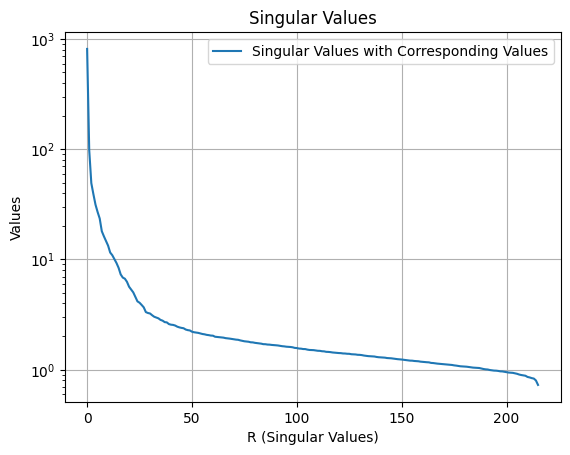

In [13]:
#2. Using the ovarian_cancer.csv dataset from the last homework, apply your implementation of PCA. 
#.  Plot singular values and plot the fraction of variance corresponding to each singular value. 

#take out features
ov_df = df.drop(columns = ['status','patients'])
#data set not workable with our function -- need to transform in to matrix
ov_df = np.mat(ov_df)
#use the function
T, S = PCA(ov_df)
#plot function Singular Values

plt.semilogy(np.diag(S));
plt.grid();
plt.xlabel('R (Singular Values)');
plt.ylabel('Values');
plt.legend(['Singular Values with Corresponding Values']);
plt.title("Singular Values");


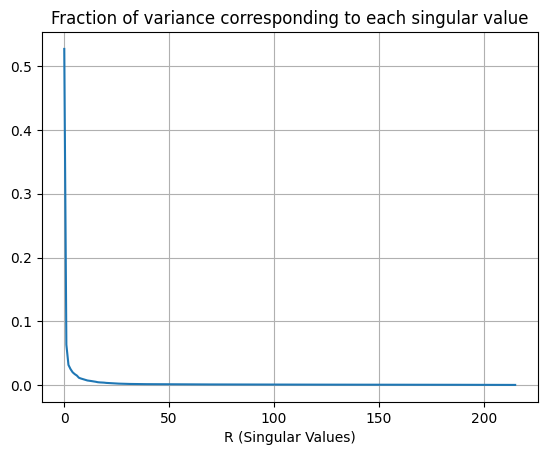

In [14]:
#plot fraction of variance corresponding to each singular value (Figure 2)

plt.plot( np.diag(S) / np.sum(np.diag(S)) );
plt.title('Fraction of variance corresponding to each singular value');
plt.xlabel('R (Singular Values)');
plt.grid()

In [6]:
#3. Find the two first principal components. Note that the ith principal component is calculated by: 







In [15]:
# II Signal decomposition.

#Question 1
#Download mixed_signals.csv from Canvas.  

#Load Data Set
df_2 = pd.read_csv('mixed_signals.csv')      #mixed_signals ds

#take out features
mix_sig = df_2.drop(columns = ['Unnamed: 0'],inplace = True)

ValueError: x, y, and format string must not be None

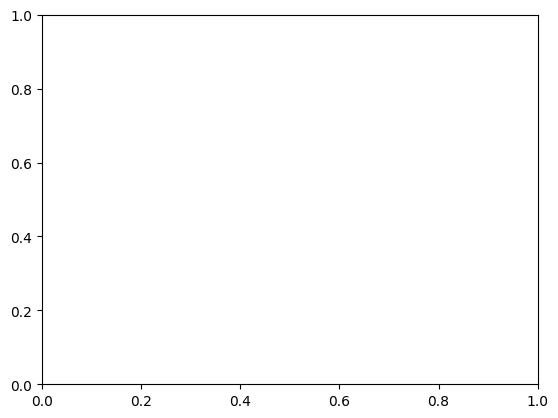

In [20]:
#mix_sig
#df_2

plt.plot(mix_sig)

In [9]:
#The rows represent time and the columns correspond to an observed signal mixture. 
#Plot each signal over time.

